# Optimization


## Introduction

<i>Optimization</i> is the selection of a <i>best</i> element with regard to some criterion from some set of available alternatives. The alternatives can be continuous and multidimensional or just a limited discrete set. Optimization is ubiquitous in engineering, as an engineer always wants to deliver an optimal product, design, or workflow.

Throughout this section on optimization, we want to find the minimum (or maximum) of a function $f(x)$ on a set. In other words, we want to select the optimum $x$, that is, the point $x$ such that $f(x) \leq f(y)$ for all $y \in (a,b)$. If we want to find the maximum of a function, we can use the same optimization methods on the negative of the function, thus considering the function $-f$.

The function $f \colon X \to \mathbb{R}$ goes from a set $X$. This set can be almost anything, e.g., an interval $(a,b)$, a discrete set of points, a two-dimensional area, or higher-dimensional spaces. However, we need to be able to compare the outputs of the function; thus, for two elements $x,y \in X$ we need to be able to say if $f(x)$ is larger, smaller, or equal to $f(y)$. Typically, this means that the output of the function is a subset of the natural numbers $\mathbb{R}$, where we have the usual inequality.

In the lingua of optimization, the function $f$ is called the <i>objective function</i>: This is the objective for our optimization, thus what we want to optimize. For a lot of engineering problems, this objective is the net present value of the project. If the set $X$ consists of a set of variables, these are called the <i> control variables</i>. These could be variables for physical settings, such as choke settings, applied torque, flow rates, and any other setting you are able to control, or material properties, such as beam thickness, length, etc. Finally, we typically have <i>constraints</i> on our control variables; you might have a maximum torque, as that is given by the limit of the motor, or a maximum flow rate a pipe can handle.

An optimization problem is often formulated as
\begin{align}
 \min_{\vec{x} \in X} f(\vec{x})
\end{align}
Here $f$ is the objective function, $\vec{x}$ are the control variables, and the constraints are given by the set $X$, which is typically a subset of $\mathbb{R}^n$.

Closed-form optimization applies techniques from calculus and algebra to solve an optimization problem. In this section, we will go through some popular optimization techniques, from simple bracket techniques, traditional gradient-based techniques, and over to techniques that do not invoke the gradient. 

### Analytical example

Find the extremum of the function $f(x) =x^2-4x+5$.

$$\begin{align}
f'(x) & = 2x-4 \\
f'(x_0) & =  0 \\
2x_0 -4 &= 0 \\
x_0 &= 2
\end{align}$$

Since $f''(x_0) =  2 > 0$, we know that the function is convex everywhere, and in particular at the point $x_0 = 2$, thus $f(x_0) = 1$ is a minimum point.


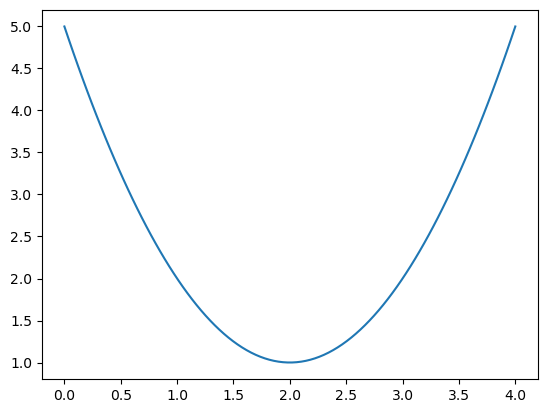

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return x**2-4*x+5

xv=np.linspace(0,4,100)

plt.plot(xv,func(xv))
plt.show()

## Numerical optimization

We gave an analytical example above, but in real engineering problems, we seldom encounter situations where the function $f(x)$ to minimize of maximize has an analytical form. <i>Numerical optimization</i> solves the optimization problem by generating a series of estimates of the solution based on discrete samples.

Applications of numerical optimization in geoscience include:
- Well control (weight on bit, torque, direction)
- Positioning of wells
- Fluid flow parameters
- Elastic properties of subsurface (based on seismic data)
- Electromagnetic properties

Note that in most geoscience applications, the function evaluation is a computationally demanding task. A function evaluation could, for example, be a full reservoir simulation, e.g., in the case of well positioning, and such simulations can take hours even in parallel mode. Thus, you want optimization routines that obtain the extremum with the least number of function evaluations.

Numerical optimization methods fall into two categories:
- Methods that only need a function value
- Methods that require both function values and gradient info.

We will start by considering methods that only need the function value, but are only applicable for a limited set of problems; bracket search methods that are applicable for unimodal functions. After that soft introduction, we will consider gradient-based methods, that is, methods that require both function values and the gradient. From there, we will revert back to methods that only rely on the function value; however, they are applicable to a wide class of problems.